# Week 3: Linear regression

**What is linear regression?**
Linear regression is a way to look at a relationship between a dependent and an independent value when there seems to be an assocation between the two variables. This can be used to make predictions about data based on data that you already have. 

In [53]:
import seaborn as sns
import sklearn as sk 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math

## Data pre-processing

In [54]:
df = pd.read_csv("data Mashable.csv")
df = df.dropna()
df_subset = df[['num_imgs', 'data_channel_is_socmed', 'is_weekend', 'global_subjectivity', 'title_subjectivity', 'shares_log']]

df_subset.head()

,num_imgs,data_channel_is_socmed,is_weekend,global_subjectivity,title_subjectivity,shares_log
0,12,0,0,0.439379,0.666667,3.322219
1,6,0,0,0.300454,0.000000,2.437751
2,0,0,0,0.575486,0.000000,3.176091
3,2,0,0,0.327220,0.000000,3.301030
4,18,0,0,0.507709,0.000000,3.778151


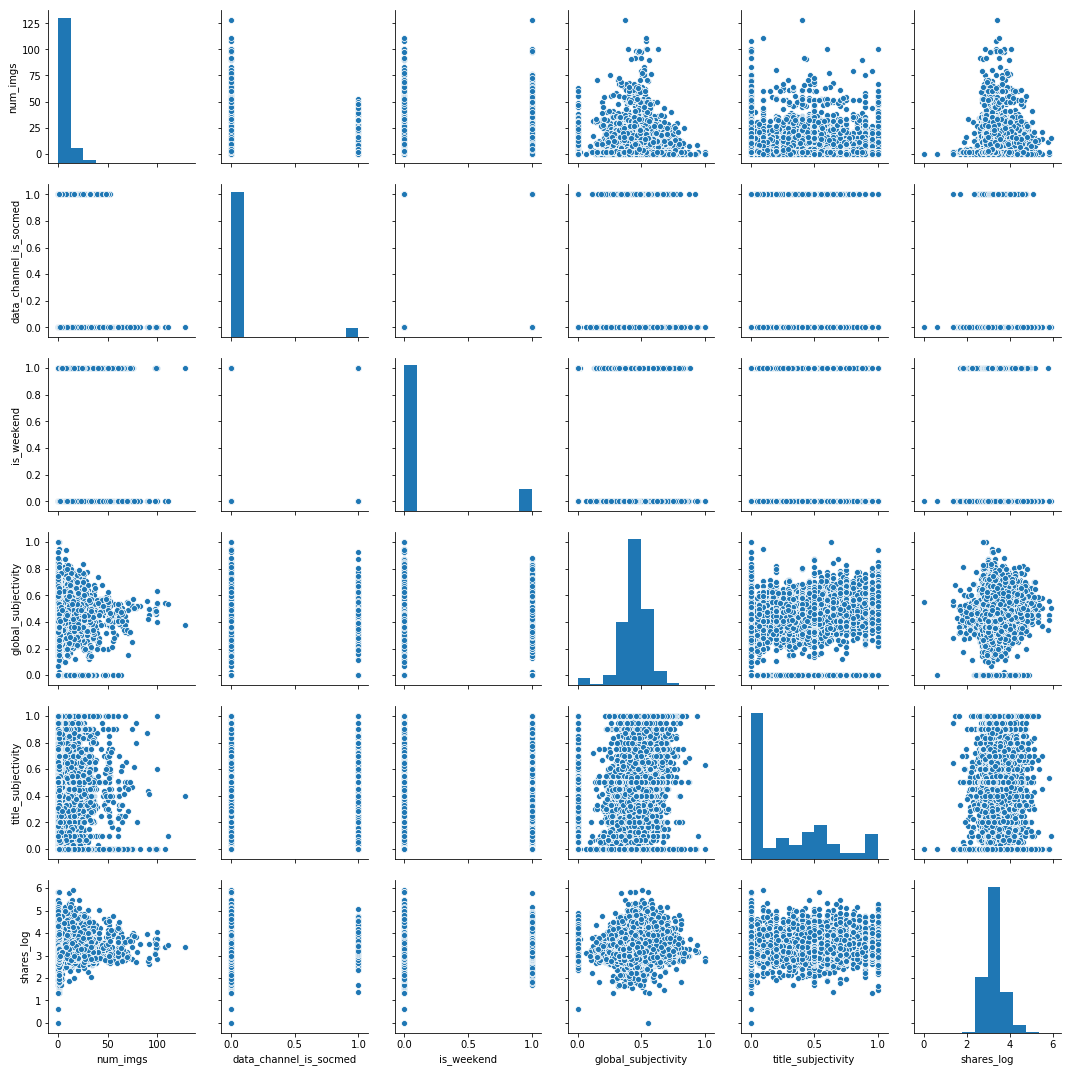

In [55]:
sns.pairplot(df_subset)

In [56]:
df_subset.corr()

,num_imgs,data_channel_is_socmed,is_weekend,global_subjectivity,title_subjectivity,shares_log
num_imgs,1.000000,-0.008554,0.053317,0.069931,0.056100,0.085575
data_channel_is_socmed,-0.008554,1.000000,-0.001594,0.026838,-0.013620,0.085516
is_weekend,0.053317,-0.001594,1.000000,0.014754,0.021418,0.105919
global_subjectivity,0.069931,0.026838,0.014754,1.000000,0.125244,0.093021
title_subjectivity,0.056100,-0.013620,0.021418,0.125244,1.000000,0.055161
shares_log,0.085575,0.085516,0.105919,0.093021,0.055161,1.000000


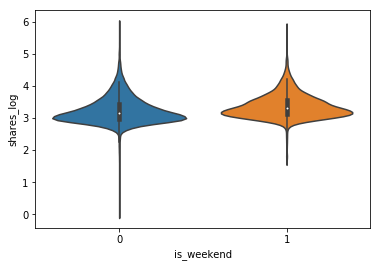

In [57]:
sns.violinplot(x='is_weekend', y='shares_log', data=df)

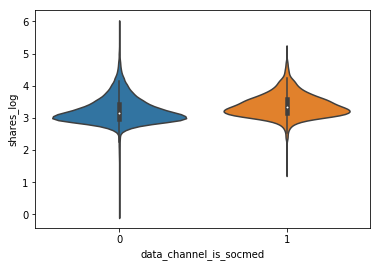

In [58]:
sns.violinplot(x='data_channel_is_socmed', y='shares_log', data=df)

In [59]:
X = df_subset[['num_imgs', 'data_channel_is_socmed', 'is_weekend', 'global_subjectivity', 'title_subjectivity']]
X.head()

,num_imgs,data_channel_is_socmed,is_weekend,global_subjectivity,title_subjectivity
0,12,0,0,0.439379,0.666667
1,6,0,0,0.300454,0.000000
2,0,0,0,0.575486,0.000000
3,2,0,0,0.327220,0.000000
4,18,0,0,0.507709,0.000000


In [60]:
y = df['shares_log']

## Training the model 

I selected the variables by looking at the scatterplots in the pairplot and looking at the correlations in the correlation matrix. From there on out I selected values that seemed to have the highest correlations, I explored a bit more by making a new dataframe with just those values (it was hard to look at a pairplot with that much variables) and using violinplots for nominal values such as is_weekend and data_channel_is_socmed to see if these showed a different distribution. Both showed a slight difference. I found it very hard to choose as it seemed that all the correlations were very low and the scatterplots showed no direct linear relation, however I think I picked out the variables that come the closest. 

**Now we will split the data into a training set and a test set**

We will use the train_test_split() function and fit the model to the training portion of the data. 
After that we calculate the coefficients to have an idea of the effects this will have on predicting the shares. 

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split #the function to split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

lm = LinearRegression(); #create the lm object
lm.fit(X_train, y_train); #fit the model, we are using the training portion of the data
coef = pd.DataFrame(X.columns.values, lm.coef_) #this creates a df with a column with the column names, and the coefficients of the model
coef

,0
0.003651,num_imgs
0.141195,data_channel_is_socmed
0.121006,is_weekend
0.285365,global_subjectivity
0.041118,title_subjectivity


In [62]:
b0 = lm.intercept_ #gets the intercept
b1 = lm.coef_[0] #lm.coef_ gets a list of coefficients (excluding the intercept). [0] gets the actual number from the list
b2 = lm.coef_[1]
b3 = lm.coef_[2]
b4 = lm.coef_[3]
b5 = lm.coef_[4]
print(f"The regression line is equal to y = {b0:.3f} + {b1:.3f}X + {b2:.3f}X + {b3:.3f}X + {b4:.3f}X + {b5:.3f}X") #.0f formats to 2 decimals.

The regression line is equal to y = 3.069 + 0.004X + 0.141X + 0.121X + 0.285X + 0.041X


$y = 3.070 + 0.004X + 0.142X + 0.128X + 0.281X + 0.055X$

In [63]:
y_test_p = lm.predict(X_test) #Generating predictions for the test data. So we use X.test, not X.train
r2_score(y_test, y_test_p)

0.03376653259829587

The R^2 is 0.03, which means 0.3% of the variation in shares is explained by the model.

In [64]:
math.sqrt(mean_squared_error(y_test, y_test_p))

0.4011503035939001

The RMSE is 0.40. Which means that the model is typically about 0.40 off in predicted shares. Finally, I will plot the predicted value against the actual shares and look at the residuals. 

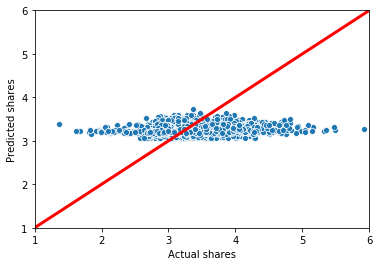

In [68]:
resid = y_test_p - y_test #residuals of the test set

sns.scatterplot(y_test, y_test_p) #plotting the predicted scores against the actual scores
plt.xlabel('Actual shares')
plt.ylabel('Predicted shares')
plt.xlim([1,6]) #Forcing the x- and y-axis to be the same length, so that we can compare 
plt.ylim([1,6])
plt.plot([1, 6], [1, 6], color='red', lw=3) #Plot a diagonal length
plt.show()

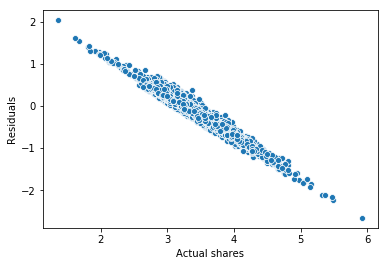

In [69]:
sns.scatterplot(y_test, resid) #plotting the predicted scores against the actual scores
plt.xlabel('Actual shares')
plt.ylabel('Residuals')
plt.show()